## import libraries

In [1]:
import pandas as pd
from src.weather import *
from src.helpers import load_df_from_dir
import numpy as np
import seaborn as sns


## Data exploratory 

In [2]:
df = load_df_from_dir('data')
# df = pd.read_csv('data/Toronto,Ontario,CA 2022-11-08 to 2022-12-18.csv', encoding='utf-8')
print(df.describe())
print(df.shape)

                            datetime          temp     feelslike  \
count                          24552  24552.000000  24552.000000   
mean   2022-07-24 06:42:29.120234496     11.144371      9.295377   
min              2021-03-03 00:00:00    -20.200000    -30.600000   
25%              2021-11-13 17:45:00      3.300000     -0.400000   
50%              2022-07-27 12:30:00     11.400000     11.400000   
75%              2023-03-31 06:15:00     19.600000     19.600000   
max              2023-12-11 23:00:00     34.900000     36.200000   
std                              NaN      9.688657     11.895454   

                dew      humidity        precip    precipprob          snow  \
count  24552.000000  24552.000000  24552.000000  24552.000000  24473.000000   
mean       4.773281     66.903084      0.087699     12.117139      0.007038   
min      -28.000000     16.470000      0.000000      0.000000      0.000000   
25%       -2.100000     56.220000      0.000000      0.000000      0.00

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24552 entries, 0 to 24551
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              24552 non-null  object        
 1   datetime          24552 non-null  datetime64[ns]
 2   temp              24552 non-null  float64       
 3   feelslike         24552 non-null  float64       
 4   dew               24552 non-null  float64       
 5   humidity          24552 non-null  float64       
 6   precip            24552 non-null  float64       
 7   precipprob        24552 non-null  int64         
 8   snow              24473 non-null  float64       
 9   snowdepth         24552 non-null  float64       
 10  windgust          18807 non-null  float64       
 11  windspeed         24552 non-null  float64       
 12  winddir           24552 non-null  int64         
 13  sealevelpressure  24552 non-null  float64       
 14  cloudcover        2455

In [4]:
df.tail()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
24547,"Toronto, ON, Canada",2023-12-11 19:00:00,1.3,-4.9,-7.0,54.15,0.0,0,0.0,0.0,...,1019.8,90.0,14.3,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"71624099999,71432099999,71508099999,CWWZ,F0888..."
24548,"Toronto, ON, Canada",2023-12-11 20:00:00,0.9,-4.6,-5.7,61.57,0.0,0,0.0,0.0,...,1020.4,93.0,14.3,0.0,0.0,0,10.0,Overcast,cloudy,"71624099999,71432099999,71508099999,CWWZ,F0888..."
24549,"Toronto, ON, Canada",2023-12-11 21:00:00,1.0,-4.2,-4.7,65.51,0.0,0,0.0,0.0,...,1020.8,87.0,14.0,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"CWWZ,F0888,CXTO,71265099999"
24550,"Toronto, ON, Canada",2023-12-11 22:00:00,1.7,-3.9,-5.2,60.12,0.0,0,0.0,0.0,...,1020.9,90.0,14.3,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"71624099999,71432099999,71508099999,CWWZ,F0888..."
24551,"Toronto, ON, Canada",2023-12-11 23:00:00,1.5,-4.4,-5.1,61.67,0.0,0,0.0,0.0,...,1021.3,86.0,14.3,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"71624099999,71432099999,71508099999,CWWZ,F0888..."


In [7]:
# show the missing values
def missing_values(data: pd.DataFrame):
    for col in data:
        missing_data = data[col].isna().sum()
        if missing_data > 0:
            perc = missing_data / len(data) * 100
            print(f'Feature {col} >> Missing entries: {missing_data} \
                |  Percentage: {round(perc, 2)} \
                |  Data Type: {data[col].dtypes}')
            
# check duplicated
missing_values(df)


216

In [6]:
director = Director()
builder = ConcreteBuilderWeather(df)
director.builder = builder

director.build_weather_dataset()

/Users/james/Documents/T431/Deep Learning/Assignments/Final Project/src/weather.py:339: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.weather.df.loc[col] = self.weather.df[col].str.replace(' ', '')


AttributeError: 'float' object has no attribute 'split'

In [ ]:

builder.weather.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ohe_clear-day               984 non-null    float64
 1   ohe_clear-night             984 non-null    float64
 2   ohe_cloudy                  984 non-null    float64
 3   ohe_fog                     984 non-null    float64
 4   ohe_partly-cloudy-day       984 non-null    float64
 5   ohe_partly-cloudy-night     984 non-null    float64
 6   ohe_rain                    984 non-null    float64
 7   ohe_snow                    984 non-null    float64
 8   ohe_wind                    984 non-null    float64
 9   temp                        984 non-null    float64
 10  feelslike                   984 non-null    float64
 11  dew                         984 non-null    float64
 12  humidity                    984 non-null    float64
 13  precip                      984 non

In [ ]:
builder.weather.df[:10]

,ohe_clear-day,ohe_clear-night,ohe_cloudy,ohe_fog,ohe_partly-cloudy-day,ohe_partly-cloudy-night,ohe_rain,ohe_snow,ohe_wind,temp,...,conditions_Partiallycloudy,conditions_Rain,conditions_Snow,day,month,year,dayofweek,weekofyear,hour,season
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4,...,0,0,0,8,11,2022,1,45,0,2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,...,0,0,0,8,11,2022,1,45,1,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.3,...,0,0,0,8,11,2022,1,45,2,2
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0,0,0,8,11,2022,1,45,3,2
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,...,0,0,0,8,11,2022,1,45,4,2
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,...,0,0,0,8,11,2022,1,45,5,2
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,...,0,0,0,8,11,2022,1,45,6,2
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,...,0,0,0,8,11,2022,1,45,7,2
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,...,0,0,0,8,11,2022,1,45,8,2
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8,...,0,0,0,8,11,2022,1,45,9,2


In [ ]:
builder.weather.df.columns

Index(['ohe_clear-day', 'ohe_clear-night', 'ohe_cloudy', 'ohe_fog',
       'ohe_partly-cloudy-day', 'ohe_partly-cloudy-night', 'ohe_rain',
       'ohe_snow', 'ohe_wind', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'severerisk', 'conditions_Clear',
       'conditions_Overcast', 'conditions_Partiallycloudy', 'conditions_Rain',
       'conditions_Snow', 'day', 'month', 'year', 'dayofweek', 'weekofyear',
       'hour', 'season'],
      dtype='object')

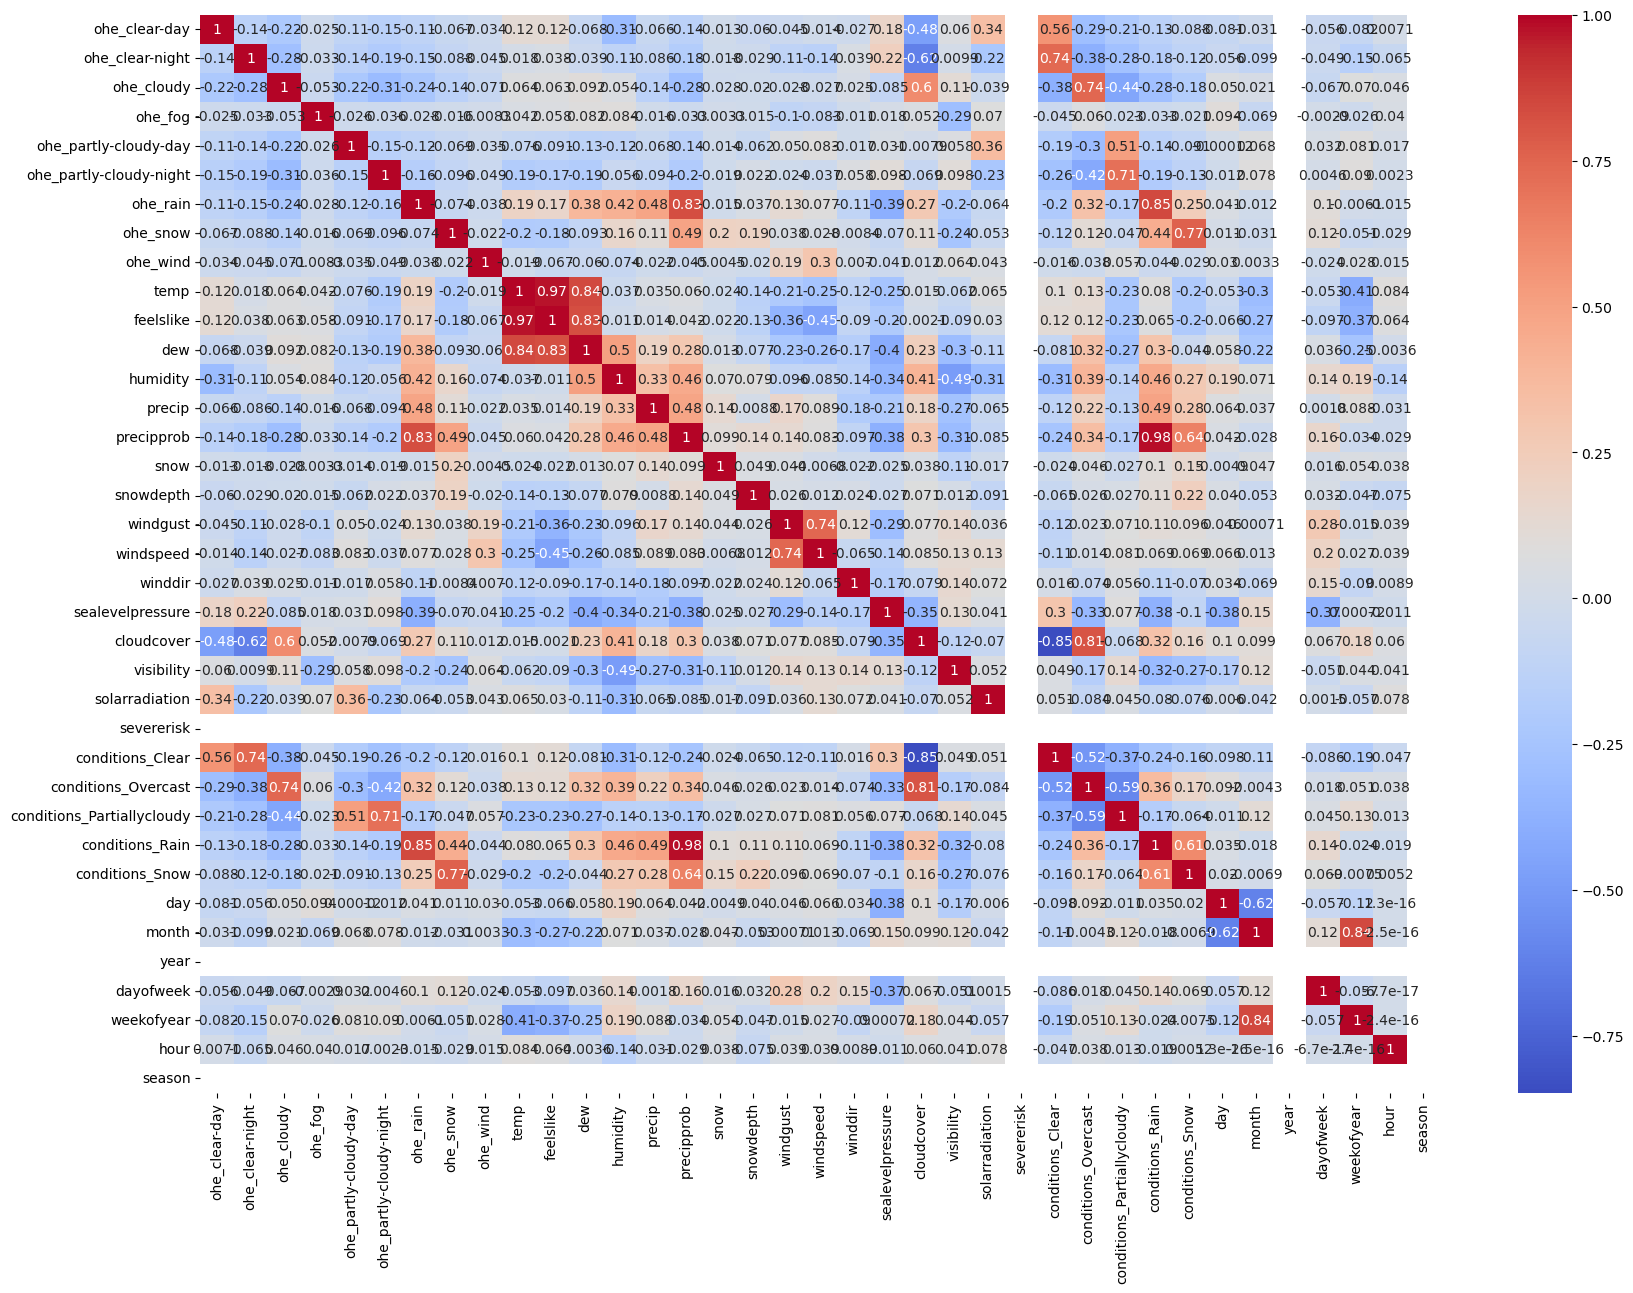

In [ ]:
WeatherData.display_corr(builder.weather.df, (20, 14))

<Axes: xlabel='cloudcover', ylabel='temp'>

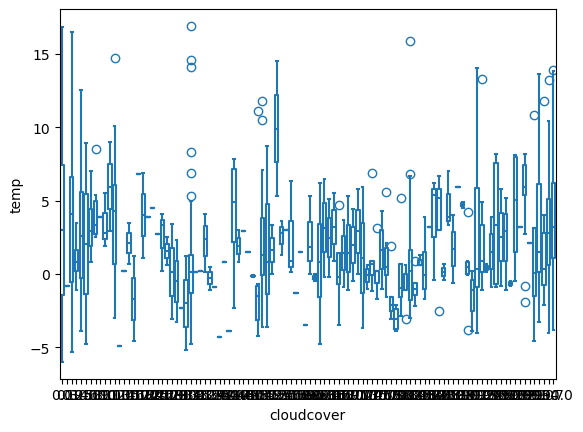

In [ ]:
sns.boxplot(data=builder.weather.df, x="cloudcover", y="temp", fill=False, gap=.1)
